# Импорт библиотек

In [2]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from IPython.display import Image
from sklearn.datasets import load_iris, load_boston, load_wine
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingClassifier, AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")
from sklearn.datasets import load_iris, load_wine, load_boston
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
%matplotlib inline 
from IPython.display import Image
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve, validation_curve
import seaborn as sns

# Загрузка данных

In [3]:
data = pd.read_csv('Admission_Predict.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Этот набор данных создан для прогнозирования поступления выпускников.

Содержание
Набор данных содержит несколько параметров, которые считаются важными во время применения для основных программ.
Включенные параметры : 
    1. GRE баллы ( из 340 ) 
    2. Результаты TOEFL (из 120 ) 
    3. Рейтинг университета ( из 5 ) 
    4. Заявление о цели и рекомендательное письмо (из 5 ) 
    5. Баллы GPA ( из 10 ) 
    6. Опыт исследований (0 или 1 ) 
    7. Шанс признания (от 0 до 1 )

In [30]:
data.shape

(400, 9)

В нашем наборе данных 400 строк и 9 столбцов. Посмотрим тип данных:

In [31]:
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

Посмотрим, есть ли пропущенные значения в данных:

In [32]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Пропусков нет, категориальных признаков нет - можно приступать к анализу данных

# Анализ данных

Анализ данных начнем с построения матрицы корреляций:

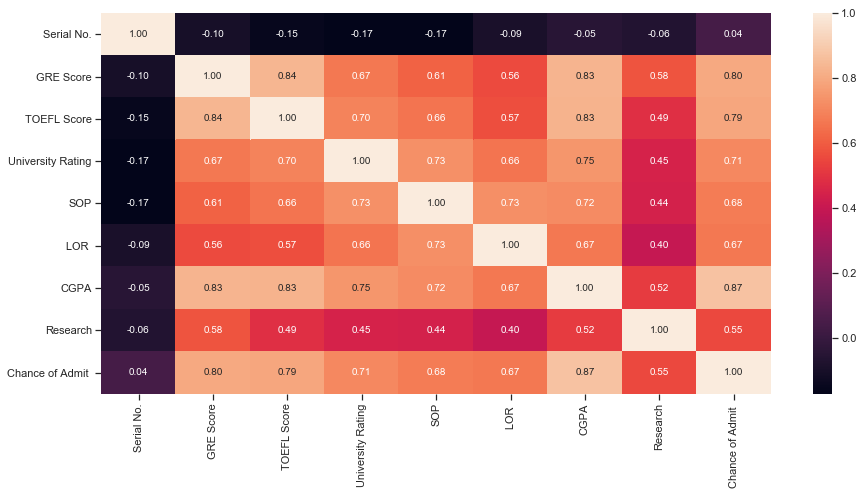

In [33]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

Для модели выберем параметры, которые хорошо кореллируют с целевым признаком. При этом из признаков, которые хорошо кореллируют
друг с другом, лучше выбрать один. Из признаков GRE Score, TOEFL Score, CGPA, University Rating оставим CGPA

In [4]:
data_m = data[['SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']]
data_m.head()

,SOP,LOR,CGPA,Research,Chance of Admit
0,4.5,4.5,9.65,1,0.92
1,4.0,4.5,8.87,1,0.76
2,3.0,3.5,8.00,1,0.72
3,3.5,2.5,8.67,1,0.80
4,2.0,3.0,8.21,0,0.65


Теперь у нас есть только подходящие данные для анализа. Еще раз посмотрим на матрицу корреляций

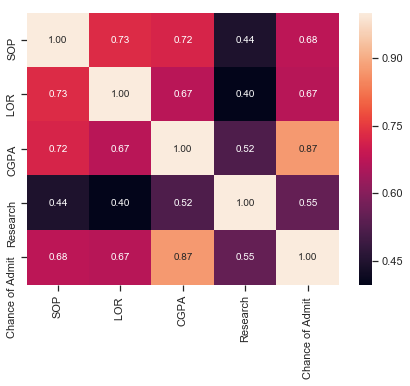

In [35]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(data_m.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

Диаграмма рассеиваний показывает зависимость двух признаков:

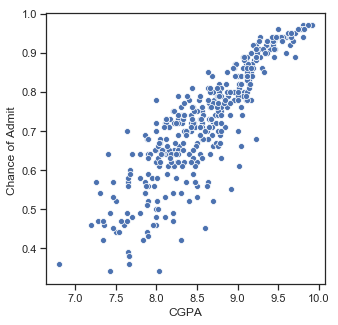

In [36]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.scatterplot(ax=ax, x='CGPA', y='Chance of Admit ', data=data)

Видна почти линейная зависимость, обязательно попробуем линейную модель

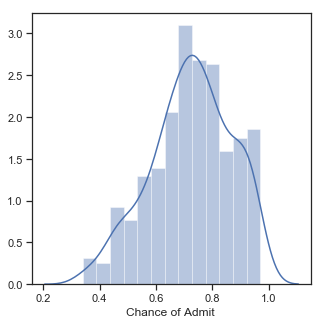

In [37]:
#Гистограмма Позволяет оценить плотность вероятности распределения данных
fig, ax = plt.subplots(figsize=(5,5)) 
sns.distplot(data['Chance of Admit '])

Можем посмотреть, как все признаки зависят между собой

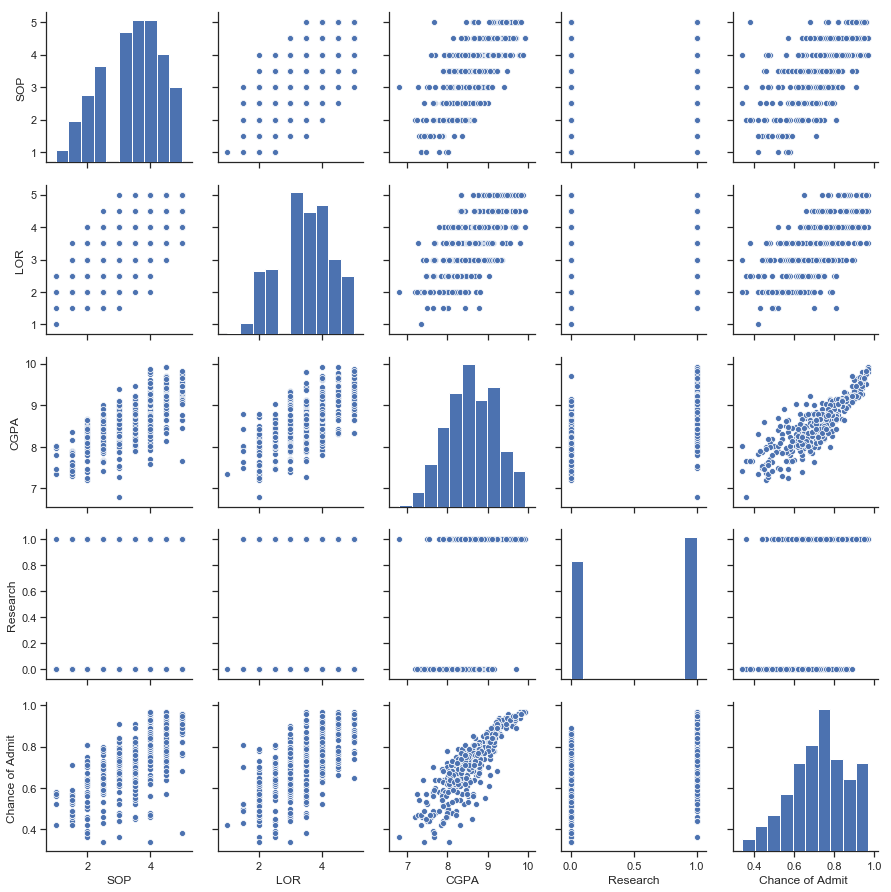

In [38]:
sns.pairplot(data_m)

Опять заметно, что многие данные находятся в линейной зависимости

# Разделение выборки

Для начала разделим целевой признак от остальных:

In [5]:
data_x = data[['SOP', 'LOR ', 'CGPA', 'Research']]
data_y = data[['Chance of Admit ']]

И теперь разделим на тренировочную выборку и тестовую, в тренировочной оставим 70% от всех данных

In [6]:
data_X_train, data_X_test, data_y_train, data_y_test = train_test_split(
    data_x, data_y, test_size=0.3, random_state=1)
data_X_train.shape, data_X_test.shape

((280, 4), (120, 4))

# Метод ближайших соседей

Начнем с одного из самых простых методов.

Сначала попробуем обучать на основе двух ближайших соседей

In [8]:
KNN_1 = KNeighborsRegressor(n_neighbors=2)
KNN_1.fit(data_X_train, data_y_train)
target_KNN_1 = KNN_1.predict(data_X_test)

In [42]:
#средняя абсолютная ошибка при 2 сосядях
mean_absolute_error(data_y_test, target_KNN_1)

0.06516666666666666

In [43]:
#средняя квадратичная ошибка при 2 сосядях
mean_squared_error(data_y_test, target_KNN_1)

0.008629166666666665

In [44]:
median_absolute_error(data_y_test, target_KNN_1)

0.040000000000000036

Теперь с помощью кросс-валидации подберем гиперпараметр:

In [240]:
n_range = np.array(range(5,55,5))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}]

In [241]:
clf_gs = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=5, scoring='neg_mean_absolute_error')
clf_gs.fit(data_X_train, data_y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

Самый лучший результат модель покажет при 10 ближайших соседях, можем в этом убедиться:

In [242]:
clf_gs.best_params_

{'n_neighbors': 10}

In [9]:
#10 ближайших соседей
KNN_2 = KNeighborsRegressor(n_neighbors=10)
KNN_2.fit(data_X_train, data_y_train)
target_KNN_2 = KNN_2.predict(data_X_test)

In [46]:
#средняя абсолютная ошибка при 10 сосядях
mean_absolute_error(data_y_test, target_KNN_2)

0.05710833333333333

In [47]:
#средняя квадратичная ошибка при 10 сосядях
mean_squared_error(data_y_test, target_KNN_2)

0.006519325

In [48]:
median_absolute_error(data_y_test, target_KNN_2)

0.04049999999999998

Средняя абсолютная и квадратичная ошибка стали намного меньше

# Линейная модель

Многие данные находятся в линейной зависимости, поэтому попробуем линейную модель

In [10]:
# Аналитическое вычисление коэффициентов регрессии
def analytic_regr_coef(x_array : np.ndarray, 
                       y_array : np.ndarray) -> Tuple[float, float]:
    x_mean = np.mean(x_array)
    y_mean = np.mean(y_array)
    var1 = np.sum([(x-x_mean)**2 for x in x_array])
    cov1 = np.sum([(x-x_mean)*(y-x_mean) for x, y in zip(x_array, y_array)])
    b1 = cov1 / var1
    b0 = y_mean - b1*x_mean
    return b0, b1

Для начала найдем коэффициенты линейной зависимости и наглядно убедимся, насколько наша зависимость похожа на линейную

In [11]:
x_array = data[['CGPA']]
y_array = data[['Chance of Admit ']]

In [12]:
df1 = pd.DataFrame(x_array)
df2 = pd.DataFrame(y_array)

In [13]:
b0, b1 = analytic_regr_coef(df1.values, df2.values)
b0, b1

(-1.0715116629341392, 0.20884722950068055)

In [14]:
# Вычисление значений y на основе x для регрессии
def y_regr(x_array : np.ndarray, b0: float, b1: float) -> np.ndarray:
    res = [b1*x+b0 for x in x_array]
    return res

In [15]:
y_array_regr = y_regr(df1.values, b0, b1)

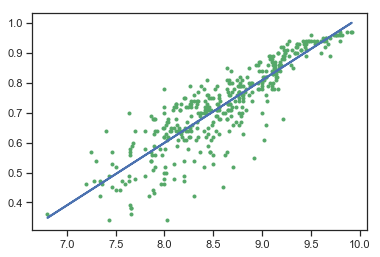

In [16]:
plt.plot(x_array, y_array, 'g.')
plt.plot(x_array, y_array_regr, 'b', linewidth=2.0)
plt.show()

Можно посмотреть, насколько данные близко к линии. Синими отрезками показаны ошибки между истинными и предсказанными значениями

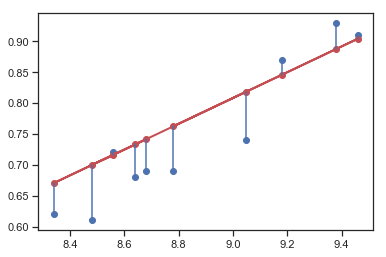

In [17]:
plt.plot(df1.values[104:114], df2.values[104:114], 'bo')
plt.plot(df1.values[104:114], y_array_regr[104:114], '-ro', linewidth=2.0)

for i in range(len(x_array[104:114])):
    x1 = df1.values[104:114][i]
    y1 = df2.values[104:114][i]
    y2 = y_array_regr[104:114][i]
    plt.plot([x1,x1],[y1,y2],'b-')

plt.show()

Попробуем обучить модель и предсказать значения:

In [18]:
reg1 = LinearRegression().fit(data_X_train, data_y_train)

In [19]:
target_LR_1 = reg1.predict(data_X_test)

In [59]:
mean_absolute_error(data_y_test, target_LR_1)

0.048049320418629506

In [60]:
median_absolute_error(data_y_test, target_LR_1)

0.032358876241800394

In [61]:
mean_squared_error(data_y_test, target_LR_1)

0.004694085057071127

И до подбора гиперпараметров наша модель показывает отличный результат

In [260]:
model = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(model,parameters, cv=None)
grid.fit(data_X_train, data_y_train)

C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=None, error_score='raise-deprecating',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'fit_intercept': [True, False], 'normalize': [True, False], 'copy_X': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [261]:
grid.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': True}

Кросс-валидация выбрала лучшими параметры по умолчанию, поэтому наши метрики до и после останутся прежними

In [20]:
reg2 = LinearRegression(copy_X = True, fit_intercept = True, normalize = True).fit(data_X_train, data_y_train)

In [21]:
target_LR_2 = reg2.predict(data_X_test)

In [22]:
mean_absolute_error(data_y_test, target_LR_2)

0.048049320418629464

In [65]:
median_absolute_error(data_y_test, target_LR_2)

0.032358876241800394

In [66]:
mean_squared_error(data_y_test, target_LR_2)

0.004694085057071122

Возможно наша зависимость меняется не совсем линейно, мы можем попробовать не линейную регрессию

# Нелинейная регрессия

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [24]:
poly_model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                       ('linear', LinearRegression(fit_intercept=False))])

In [25]:
poly_model.fit(data_X_train, data_y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('linear', LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False))])

In [58]:
target_NR = poly_model.predict(data_X_test)

In [59]:
mean_absolute_error(data_y_test, target_NR)

0.0518443841074597

In [60]:
median_absolute_error(data_y_test, target_NR)

0.034800272363339046

In [61]:
mean_squared_error(data_y_test, target_NR)

0.006016501338461484

Ошибки при построении линейной модели меньше

# Метод опорных векторов

Идея метода состоит в том, что мы ищем гиперпоскости, которые разделили бы различные значения целевой переменной

In [26]:
xx = df1.values
yy = df2.values
def plot_regr(clf):
    title = clf.__repr__
    clf.fit(xx.reshape(-1, 1), yy)
    y_pred = clf.predict(xx.reshape(-1, 1))
    fig, ax = plt.subplots(figsize=(5,5))
    ax.set_title(title)
    ax.plot(xx, yy, 'b.')
    ax.plot(xx, y_pred, 'ro')
    plt.show()

Для начала визуализируем гипекплоскости

C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


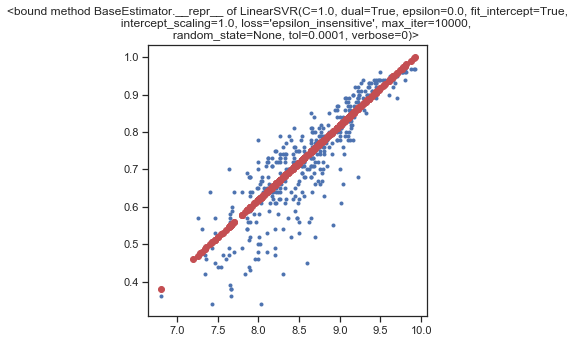

In [27]:
plot_regr(LinearSVR(C=1.0, max_iter=10000))

LinearSVC - линейный классификатор на основе SVM. Не поддерживает ядра, работает быстрее других методов.

C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


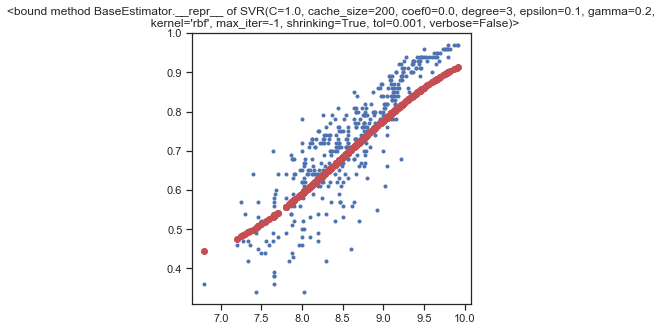

In [29]:
plot_regr(SVR(kernel='rbf', gamma=0.2, C=1.0))

SVC - основной классификатор на основе SVM. Поддерживает различные ядра. Будем для предсказания использовать его

In [30]:
svr_1 = SVR().fit(data_X_train, data_y_train)

C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [31]:
target_SVR_1 = svr_1.predict(data_X_test)

In [32]:
mean_absolute_error(data_y_test, target_SVR_1)

0.06923807439029434

In [73]:
median_absolute_error(data_y_test, target_SVR_1)

0.06107009452472251

In [74]:
mean_squared_error(data_y_test, target_SVR_1)

0.006926651191515107

In [275]:
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
grid = GridSearchCV(SVR(),param_grid,refit = True, verbose=2)
grid.fit(data_X_train, data_y_train)

C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\sit

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ...........

C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] .................... C=1, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .................... C=1, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................


C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] .................. C=1, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] .................. C=1, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] .................. C=1, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................

C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 


[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] ................. C=1, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] ................. C=1, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................


C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] ................. C=1, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................


C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................


C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=10, gamma=1, kernel=linear, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................


C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ................... C=10, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ................... C=10, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................


C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................


C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=10, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] ................. C=10, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] ................. C=10, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................


C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV] ................ C=10, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=linear ...............................

C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



[CV] ................ C=10, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV] ................ C=10, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ................... C=10, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................

C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 


[CV] ................... C=10, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ................... C=10, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1, kernel=linear ...................................


C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=100, gamma=1, kernel=linear, total=   0.4s
[CV] C=100, gamma=1, kernel=linear ...................................


C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=100, gamma=1, kernel=linear, total=   0.3s
[CV] C=100, gamma=1, kernel=linear ...................................


C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=100, gamma=1, kernel=linear, total=   0.2s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................


C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] .................. C=100, gamma=0.1, kernel=linear, total=   0.4s
[CV] C=100, gamma=0.1, kernel=linear .................................


C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100, gamma=0.1, kernel=linear, total=   0.3s
[CV] C=100, gamma=0.1, kernel=linear .................................


C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=100, gamma=0.1, kernel=linear, total=   0.2s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................


C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................


C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=100, gamma=0.001, kernel=linear, total=   0.4s
[CV] C=100, gamma=0.001, kernel=linear ...............................


C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=100, gamma=0.001, kernel=linear, total=   0.3s
[CV] C=100, gamma=0.001, kernel=linear ...............................


C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=100, gamma=0.001, kernel=linear, total=   0.2s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=linear ..............................


C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] ............... C=100, gamma=0.0001, kernel=linear, total=   0.4s
[CV] C=100, gamma=0.0001, kernel=linear ..............................


C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... C=100, gamma=0.0001, kernel=linear, total=   0.3s
[CV] C=100, gamma=0.0001, kernel=linear ..............................


C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... C=100, gamma=0.0001, kernel=linear, total=   0.2s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................


C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] ................... C=1000, gamma=1, kernel=linear, total=   4.3s
[CV] C=1000, gamma=1, kernel=linear ..................................


C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1000, gamma=1, kernel=linear, total=   2.8s
[CV] C=1000, gamma=1, kernel=linear ..................................


C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1000, gamma=1, kernel=linear, total=   3.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................

C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 


[CV] ................. C=1000, gamma=0.1, kernel=linear, total=   4.6s
[CV] C=1000, gamma=0.1, kernel=linear ................................


C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=1000, gamma=0.1, kernel=linear, total=   2.7s
[CV] C=1000, gamma=0.1, kernel=linear ................................


C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=1000, gamma=0.1, kernel=linear, total=   3.1s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................


C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1000, gamma=0.1, kernel=rbf, total=   0.5s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................


C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1000, gamma=0.1, kernel=rbf, total=   0.4s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................


C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1000, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=1000, gamma=0.001, kernel=linear ..............................


C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... C=1000, gamma=0.001, kernel=linear, total=   4.3s
[CV] C=1000, gamma=0.001, kernel=linear ..............................


C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... C=1000, gamma=0.001, kernel=linear, total=   2.7s
[CV] C=1000, gamma=0.001, kernel=linear ..............................


C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... C=1000, gamma=0.001, kernel=linear, total=   3.1s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] .................. C=1000, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] .................. C=1000, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] .................. C=1000, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=linear .............................


C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[CV] .............. C=1000, gamma=0.0001, kernel=linear, total=   4.3s
[CV] C=1000, gamma=0.0001, kernel=linear .............................


C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .............. C=1000, gamma=0.0001, kernel=linear, total=   2.6s
[CV] C=1000, gamma=0.0001, kernel=linear .............................


C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .............. C=1000, gamma=0.0001, kernel=linear, total=   3.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ................. C=1000, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ................. C=1000, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ................. C=1000, gamma=0.0001, kernel=rbf, total=   0.0s


C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:   52.6s finished
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` paramet

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 10, 100, 1000], 'gamma': [1, 0.1, 0.001, 0.0001], 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [276]:
grid.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'linear'}

In [34]:
svr_2 = SVR(C=1000, gamma = 1, kernel = 'linear').fit(data_X_train, data_y_train)

C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
target_SVR_2 = svr_2.predict(data_X_test)

In [77]:
mean_absolute_error(data_y_test, target_SVR_2)

0.05951977595799686

In [78]:
median_absolute_error(data_y_test, target_SVR_2)

0.04451267869095321

In [79]:
mean_squared_error(data_y_test, target_SVR_2)

0.005471558628510172

После подбора гиперпараметров метрики заметно улучшились. Посмотрим, как покажут себя более сложные модели

# Ансамблевые модели

Идея использования ансамблевых моделей состоит в том, что оценивается результат совместного голосования различных моделей

# RandomForestRegressor

Случайный лес можно рассматривать как алгоритмом бэггинга над решающими деревьями.

In [36]:
x_array = data[['SOP', 'LOR ', 'CGPA', 'Research']]
y_array = data[['Chance of Admit ']]
df1 = pd.DataFrame(x_array)
df2 = pd.DataFrame(y_array)

In [37]:
rf_rg_1 = RandomForestRegressor(random_state=1)
rf_rg_1.fit(data_X_train, data_y_train)

C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\cveto\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [38]:
target_RFR_1 = rf_rg_1.predict(data_X_test)

In [83]:
mean_absolute_error(data_y_test, target_RFR_1)

0.05528097222222223

In [84]:
median_absolute_error(data_y_test, target_RFR_1)

0.03250000000000003

In [85]:
mean_squared_error(data_y_test, target_RFR_1)

0.006368293155092593

In [288]:
tuned_parameters = {'n_estimators': [500, 700, 1000], 'max_depth': [None, 1, 2, 3]}

In [289]:
CV_rfr = GridSearchCV(RandomForestRegressor(), param_grid=tuned_parameters, cv=5, n_jobs=-1, verbose=1)

In [290]:
CV_rfr.fit(data_X_train, data_y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  2.0min finished
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [500, 700, 1000], 'max_depth': [None, 1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [291]:
CV_rfr.best_params_

{'max_depth': 3, 'n_estimators': 1000}

In [39]:
rf_rg_2 = RandomForestRegressor(random_state=1, max_depth = 3, n_estimators = 500)
rf_rg_2.fit(data_X_train, data_y_train)

C:\Users\cveto\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [40]:
target_RFR_2 = rf_rg_2.predict(data_X_test)

In [41]:
mean_absolute_error(data_y_test, target_RFR_2)

0.051375405125216315

In [295]:
median_absolute_error(data_y_test,  target_RFR_2)

0.04108627827771094

In [296]:
mean_squared_error(data_y_test,  target_RFR_2)

0.005402414245926515

Подбор гиперпараметров уменьшил среднюю абсолютную и квадратичную ошибк

# AdaBoost

Идея бустинга состоит в том, что строится многослойная модель или регрессии и каждый следующий слой пытается минимизировать ошибку, допущенную на предыдущем слое.

In [42]:
ab_1 = AdaBoostRegressor(random_state=1, base_estimator = RandomForestRegressor(random_state=1, max_depth = 3, n_estimators = 500))
ab_1.fit(data_X_train, data_y_train)

C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(base_estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False),
         learning_rate=1.0, loss='linear', n_estimators=50, random_state=1)

За основу взяли модель случайного леса

In [43]:
target_AB_1 = ab_1.predict(data_X_test)

In [91]:
mean_absolute_error(data_y_test, target_AB_1)

0.054566298919601214

In [92]:
median_absolute_error(data_y_test, target_AB_1)

0.042637100219795

In [93]:
mean_squared_error(data_y_test, target_AB_1)

0.005508598265625999

In [302]:
parameters = {'n_estimators': (1, 2), 'base_estimator__max_depth': (1, 2)}

In [303]:
CV_ab = GridSearchCV(ab_1, parameters)

In [304]:
CV_ab.fit(data_X_train, data_y_train)

C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=AdaBoostRegressor(base_estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False),
         learning_rate=1.0, loss='linear', n_estimators=1, random_state=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': (1, 2), 'base_estimator__max_depth': (1, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [305]:
CV_ab.best_params_

{'base_estimator__max_depth': 2, 'n_estimators': 1}

In [44]:
ab_2 = AdaBoostRegressor(random_state=1, base_estimator = rf_rg_2, n_estimators = 1)
ab_2.fit(data_X_train, data_y_train)

C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(base_estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False),
         learning_rate=1.0, loss='linear', n_estimators=1, random_state=1)

In [45]:
target_AB_2 = ab_2.predict(data_X_test)

In [96]:
mean_absolute_error(data_y_test, target_AB_2)

0.05464397994147229

In [97]:
median_absolute_error(data_y_test, target_AB_2)

0.030156371218753975

In [98]:
mean_squared_error(data_y_test, target_AB_2)

0.005896068502341001

В настоящее время алгоритм AdaBoost считается устаревшим и вместо него используются другие, например, Метод группового учета аргументов

# Метод группового учета аргументов

In [46]:
from gmdhpy import gmdh 

In [47]:
from gmdhpy.gmdh import MultilayerGMDH
gmdh_1 = MultilayerGMDH()

In [48]:
gmdh_1.fit(data_X_train, data_y_train)
target_GMDH_1 = gmdh_1.predict(data_X_test)

train layer0 in 0.03 sec
train layer1 in 0.14 sec
train layer2 in 0.15 sec
train layer3 in 0.15 sec
train layer4 in 0.16 sec
train layer5 in 0.16 sec
train layer6 in 0.14 sec


In [118]:
mean_absolute_error(data_y_test, target_GMDH_1)

0.05057696876330204

In [119]:
median_absolute_error(data_y_test, target_GMDH_1)

0.035464552069497834

In [120]:
mean_squared_error(data_y_test, target_GMDH_1)

0.004774802394220618

In [49]:
gmdh_2 = MultilayerGMDH(ref_functions=('linear_cov', 'quadratic', 'cubic', 'linear'))
gmdh_2.fit(data_X_train, data_y_train)
target_GMDH_2 = gmdh_2.predict(data_X_test)

train layer0 in 0.16 sec
train layer1 in 0.60 sec
train layer2 in 0.67 sec
train layer3 in 0.62 sec
train layer4 in 0.73 sec
train layer5 in 0.69 sec
train layer6 in 0.70 sec


In [134]:
mean_absolute_error(data_y_test, target_GMDH_2)

0.05196623583543709

In [135]:
median_absolute_error(data_y_test, target_GMDH_2)

0.03651252815840089

In [136]:
mean_squared_error(data_y_test, target_GMDH_2)

0.005204076806610007

Модель показывает очень хорошие метрики, но до подбора гиперпараметров они были лучше

# Анализ

Будет удобнее анализировать модели, если собрать все метрики в одном месте. Для более удобного анализа визуализируем все метрики

In [62]:
d1 = [{"GS": 'до', "model_№": 1, "model": "KNN", "mean_absolute_error" : mean_absolute_error(data_y_test, target_KNN_1), "median_absolute_error": median_absolute_error(data_y_test, target_KNN_1), 
     "mean_squared_error": mean_squared_error(data_y_test, target_KNN_1)}, {"GS": 'до',"model_№": 2, "model": "LR","mean_absolute_error" : mean_absolute_error(data_y_test, target_LR_1), "median_absolute_error": median_absolute_error(data_y_test, target_LR_1), 
     "mean_squared_error": mean_squared_error(data_y_test, target_LR_1)}, {"GS": 'до',"model_№": 3, "model": "SVR", "mean_absolute_error" : mean_absolute_error(data_y_test, target_SVR_1), "median_absolute_error": median_absolute_error(data_y_test, target_SVR_1), 
     "mean_squared_error": mean_squared_error(data_y_test, target_SVR_1)}, {"GS": 'до',"model_№": 4, "model": "RFR", "mean_absolute_error" : mean_absolute_error(data_y_test, target_RFR_1), "median_absolute_error": median_absolute_error(data_y_test, target_RFR_1), 
     "mean_squared_error": mean_squared_error(data_y_test, target_RFR_1)}, {"GS": 'до',"model_№": 5, "model": "AB", "mean_absolute_error" : mean_absolute_error(data_y_test, target_AB_1), "median_absolute_error": median_absolute_error(data_y_test, target_AB_1), 
     "mean_squared_error": mean_squared_error(data_y_test, target_AB_1)}, {"GS": 'до', "model_№": 6, "model": "GMDH", "mean_absolute_error" : mean_absolute_error(data_y_test, target_GMDH_1), "median_absolute_error": median_absolute_error(data_y_test, target_GMDH_1), 
     "mean_squared_error": mean_squared_error(data_y_test, target_GMDH_1)} ,{"GS": 'до', "model_№": 7, "model": "NR", "mean_absolute_error" : mean_absolute_error(data_y_test, target_NR), "median_absolute_error": median_absolute_error(data_y_test, target_NR), 
     "mean_squared_error": mean_squared_error(data_y_test, target_NR)}, {"GS": 'после',"model_№": 1, "model": "KNN", "mean_absolute_error" : mean_absolute_error(data_y_test, target_KNN_2), "median_absolute_error": median_absolute_error(data_y_test, target_KNN_2), 
     "mean_squared_error": mean_squared_error(data_y_test, target_KNN_2)}, {"GS": 'после',"model_№": 2, "model": "LR","mean_absolute_error" : mean_absolute_error(data_y_test, target_LR_2), "median_absolute_error": median_absolute_error(data_y_test, target_LR_2), 
     "mean_squared_error": mean_squared_error(data_y_test, target_LR_2)}, {"GS": 'после',"model_№": 3, "model": "SVR", "mean_absolute_error" : mean_absolute_error(data_y_test, target_SVR_2), "median_absolute_error": median_absolute_error(data_y_test, target_SVR_2), 
     "mean_squared_error": mean_squared_error(data_y_test, target_SVR_2)}, {"GS": 'после',"model_№": 4, "model": "RFR", "mean_absolute_error" : mean_absolute_error(data_y_test, target_RFR_2), "median_absolute_error": median_absolute_error(data_y_test, target_RFR_2), 
     "mean_squared_error": mean_squared_error(data_y_test, target_RFR_2)}, {"GS": 'после',"model_№": 5, "model": "AB", "mean_absolute_error" : mean_absolute_error(data_y_test, target_AB_2), "median_absolute_error": median_absolute_error(data_y_test, target_AB_2), 
     "mean_squared_error": mean_squared_error(data_y_test, target_AB_2)}, {"GS": 'после', "model_№": 6, "model": "GMDH", "mean_absolute_error" : mean_absolute_error(data_y_test, target_GMDH_2), "median_absolute_error": median_absolute_error(data_y_test, target_GMDH_2), 
     "mean_squared_error": mean_squared_error(data_y_test, target_GMDH_2)}   ]

In [63]:
dd2 = pd.DataFrame(d1)

In [64]:
print(dd2)

       GS  mean_absolute_error  mean_squared_error  median_absolute_error  \
0      до             0.065167            0.008629               0.040000   
1      до             0.048049            0.004694               0.032359   
2      до             0.069238            0.006927               0.061070   
3      до             0.055281            0.006368               0.032500   
4      до             0.054566            0.005509               0.042637   
5      до             0.050601            0.004774               0.035461   
6      до             0.051844            0.006017               0.034800   
7   после             0.057108            0.006519               0.040500   
8   после             0.048049            0.004694               0.032359   
9   после             0.059520            0.005472               0.044513   
10  после             0.051375            0.005402               0.041086   
11  после             0.054644            0.005896               0.030156   

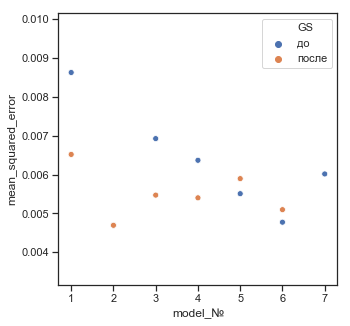

In [66]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.scatterplot(ax=ax, x='model_№', y='mean_squared_error', data=dd2, hue='GS')

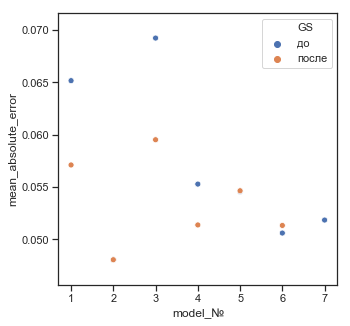

In [67]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.scatterplot(ax=ax, x='model_№', y='mean_absolute_error', data=dd2, hue='GS')

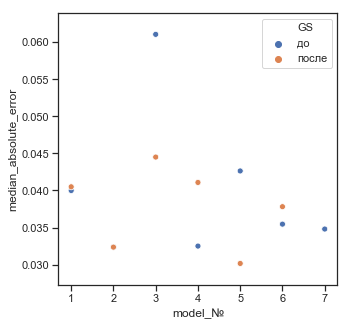

In [68]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.scatterplot(ax=ax, x='model_№', y='median_absolute_error', data=dd2, hue='GS')

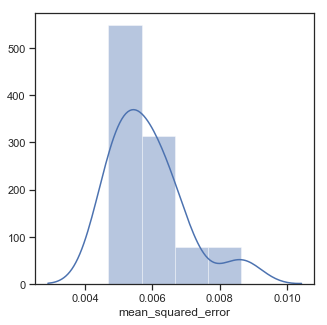

In [69]:
#Гистограмма Позволяет оценить плотность вероятности распределения данных
fig, ax = plt.subplots(figsize=(5,5)) 
sns.distplot(dd2['mean_squared_error'])

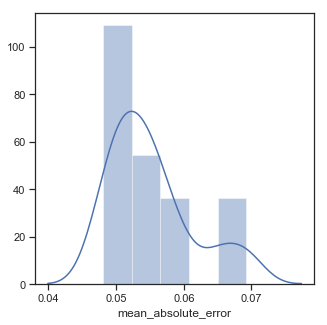

In [70]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.distplot(dd2['mean_absolute_error'])

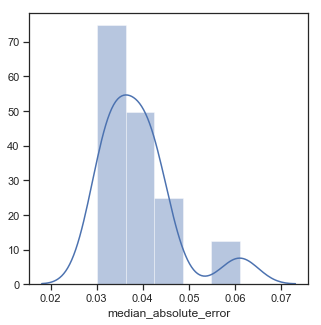

In [71]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.distplot(dd2['median_absolute_error'])

C:\Users\cveto\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


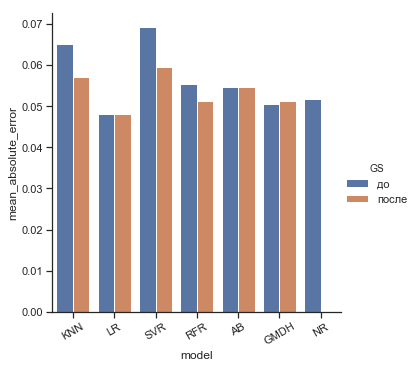

In [72]:
g = sns.factorplot(x='model'
                   ,y= 'mean_absolute_error'
                   ,hue='GS'
                   ,data=dd2
                   ,kind='bar'
                
                   )
g.set_xticklabels(rotation=30)

Средняя абсолютная ошибка меньше всего у линейной модели, модели RFR и GMDH

C:\Users\cveto\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


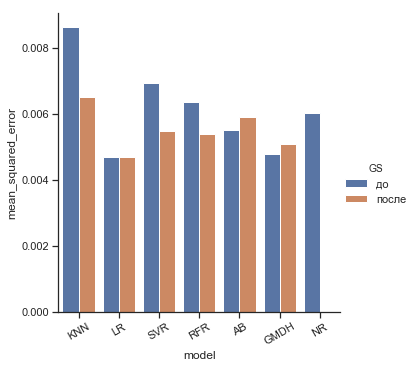

In [73]:
g = sns.factorplot(x='model'
                   ,y= 'mean_squared_error'
                   ,hue='GS'
                   ,data=dd2
                   ,kind='bar'
                
                   )
g.set_xticklabels(rotation=30)

C:\Users\cveto\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


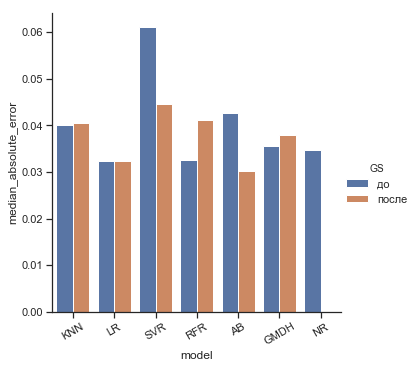

In [74]:
g = sns.factorplot(x='model'
                   ,y= 'median_absolute_error'
                   ,hue='GS'
                   ,data=dd2
                   ,kind='bar'
                
                   )
g.set_xticklabels(rotation=30)

Медиана меньше у линейной модели,RFR (до подбора гиперпараметров), AB

In [75]:
print(dd2['mean_absolute_error'].describe())

count    13.000000
mean      0.055136
std       0.006349
min       0.048049
25%       0.051327
50%       0.054566
75%       0.057108
max       0.069238
Name: mean_absolute_error, dtype: float64


In [76]:
print(dd2['median_absolute_error'].describe())

count    13.000000
mean      0.038866
std       0.008054
min       0.030156
25%       0.032500
50%       0.037816
75%       0.041086
max       0.061070
Name: median_absolute_error, dtype: float64


In [77]:
print(dd2['mean_squared_error'].describe())

count    13.000000
mean      0.005846
std       0.001099
min       0.004694
25%       0.005097
50%       0.005509
75%       0.006368
max       0.008629
Name: mean_squared_error, dtype: float64


Вывод: при анализе всех метрик всегда лидирует линейная модель. Остальные модели в топе - ансамблевые. Так как линейная модель более простая, чем ансамблевые, стоит однозначно пользоваться ей. Этого стоило ожидать, так как в начале при визуализации мы убедились, что почти все признаки находятся в линейной зависимости. Это и логично, особенность датасета такова, что шанс поступления напрямую зависит от оценок за экзамены. Так же можно заметить, что подбор гиперпараметров всегда улучшает метрики. Это связано с тем, что нет отклонений от основной тенденции (логично, что с хорошими оценками у абитуриента высокие шансы поступить и наоборот).

Медиана для линейной модели = 0.032359. Допустим, у абитуриента шанс поступить 0.8, а наша модель предсказала 0.83 или 0.77, что очень хорошо и дает примерное представление о шансах абитуриента